## Boolean implication analysis of single-cell data predicts retinal cell type markers
### Rohan Subramanian and Debashis Sahoo

### Index

#### <br>[Figure 2](#f2)</br>
<br>[Rod PRs (top left)](#f2a)</br>
<br>[Cone PRs (top right)](#f2b)</br>
<br>[RGCs (bottom left)](#f2c)</br>
<br>[RPE (bottom center)](#f2d)</br>
<br>[Analysis of GSE63472 (bottom right)](#f2e)</br>

#### <br>[Figure 3](#f3)</br>
<br>[Figure 3B](#f3b)</br>
<br>[Figure 3C](#f3c)</br>
<br>[Figure 3D](#f3d)</br>
<br>[Figure 3E](#f3e)</br>

#### <br>[Figure 4](#f4)</br>
<br>[Violin Plots in GSE84859 (left column)](#f4a)</br>
<br>[Violin Plots in GSE98838 (central column)](#f4b)</br>
<br>[Violin Plots in GSE130636 (right column)](#f4c)</br>

#### <br>[Figure S1](#fs1)</br>

#### <br>[Figure S2](#fs2v2)</br>
<br>[Figure S2A](#s2v2a)</br>
<br>[Figure S2B](#s2v2b)</br>
<br>[Figure S2C](#s2v2c)</br>

#### <br>[Table S1](#ts1)</br>
#### <br>[Table S2](#ts2)</br>

In [4]:
#IMPORT STATEMENTS
import sys
sys.path.append("/Users/rohan/public_html/Hegemon")
import StepMiner as smn
import HegemonUtil as hu
import re
import numpy as np
import scipy
import math
import itertools
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import statsmodels.stats.proportion
import seaborn as sns
import scanpy as sc

## Figure 2 - Results <a id="f2"></a>

### Rod PRs (top left) <a id="f2a"></a>

In [95]:
#Import data from GSE98556
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT29"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

#Bait Genes PDE6B and NR2E3
res1 = h.getBooleanRelations("PDE6B")
res2 = h.getBooleanRelations("NR2E3")

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.25) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.25) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5) and \
        (l4[i] == 3 or l4[i] == 5)]

#Genes from SRCCA (Phillips et al 2017)
idstr = '''ABCA4	CNGA1	FOXJ1	MAK	PFKFB2	RGS9	TTC39C
ABCA7	CNGB1	GDF10	MSI1	PfAS4	RHO	UBXN11
AHI1	CNTRL	GNAT1	MTA2	PLEKHBl	ROM1	UCKL1
AIPL1	CROCC	GNGT1	NME7	PODXL	RPl	
ANKRD53	DEFB119	GRK1	NOL6	PPEF2	RTBDN	
CACNA2D4	ELOVL4	IMPG2	NR2E3	PTP4A3	SAG	
CASZ1	EVL	IQGAP2	NRL	PTPN13	SPTBNS	
CDHR1	F13A1	JMJDlC	PDE6B	RBP3	SYCE1L	
CDR2	FAM57B	LSR	PDE6G	RDH12	SYVN1	
'''

#Gold standard rod PR genes
idstr1 = '''	NRL	NR2E3		
				
CNGA1				RGS9
CNGB1				RHO
	GNAT1			ROM1
	GNGT1			
	GRK1			
		NR2E3		SAG
		NRL		
		PDE6B		
		PDE6G		
'''

ids = re.split("\s", idstr)
ids1 = re.split("\s", idstr1)

print("Genes from Boolean Analysis")
print (" ".join(sorted(res3)))
print(len(res3))
print("--")

#Intersection of SRCCA and Boolean Analysis
res4 = list(set(ids) & set(res3))
print("Intersection with SRCCA")
print (" ".join(sorted(res4)))
print(len(res4))

Genes from Boolean Analysis
ABCA4 AIPL1 BCO2 CABP5 CASZ1 CLUL1 CNGA1 CNGB1 COBLL1 DDC DEFB119 GNAT1 GNGT1 GPX3 GUCA1A IMPG1 LGALSL MCF2L2 MPP4 NR2E3 NRL PDC PDE6A PDE6B PDE6G PODXL PPEF2 PRPH2 RASSF2 RBP3 RGS9 RHO ROM1 RP1 SAG SAMD7 SEPT4 SLC6A6 STEAP2 TRPM6 TTC39C USH2A USP2
43
--
Intersection with SRCCA
ABCA4 AIPL1 CASZ1 CNGA1 CNGB1 DEFB119 GNAT1 GNGT1 NR2E3 NRL PDE6B PDE6G PODXL PPEF2 RBP3 RGS9 RHO ROM1 SAG TTC39C
20


### Cone PRs (top right) <a id="f2b"></a>

In [96]:
#Import data from GSE98556
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT29"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

#Bait Genes ARR3 and GNAT2
res1 = h.getBooleanRelations("ARR3")
res2 = h.getBooleanRelations("GNAT2")

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]

res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5) and \
        (l4[i] == 3 or l4[i] == 5)]

#All genes from Correlational Analysis
ids = ['AIPL1','CADM2','CPE','DST', 'FAM123A', 'GUCA1A', 'LPCAT1', 'NEUROD4','PLEKHB1', 'RCVRN', 'RXRG', 
       'SLC40A1', 'SYT1', 'ANKRD33B', 'CDHR1', 'CPLX4', 'EGFLAM', 'GABRR2', 'IMPG1', 'MAK', 'OTX2',
       'PRDM1', 'RD3', 'SEPT4', 'SLC6A6', 'THRB', 'ARL6', 'CERKL', 'CRX', 'EML1', 'GNAT2', 'IMPG2',
       'MAOA', 'PDC', 'PROM1', 'RP1', 'SGIP1', 'SNAP25', 'UNC119', 'ARR3', 'CHRNA3', 'DCT', 'ENO2',
       'GNB3','KCNV2','MPP4', 'PDE6H', 'RAPGEF4', 'RPGRIP1', 'SLC17A7', 'STX3', 'USH2A', 'CACNB2',
       'CHRNA5', 'DLG4', 'EYS', 'GNGT2', 'LBH', 'NEUROD1', 'PEX5L', 'RBP3', 'RS1', 'SLC1A7', 'SYP',
       'VTN', 'AKAP9', 'ARMC9', 'C8orf46', 'CADPS', 'FGF12', 'FSTL5', 'ISOC1', 'NCKAP5', 'PRICKLE2', 'SCN3B',
       'SLC38A5', 'TRAK2', 'TUBA4A', 'COBLL1', 'FMN1', 'GALNT13', 'LGALSL', 'NPTX1', 'RALGPS2', 'SEMA3C', 
       'STXBP5L', 'TRIM36', 'XRCC4', 'FAM57B', 'FRMPD1', 'GPC5', 'MEGF9', 'PCBP4', 'ROBO2', 'SH3GL2', 'TPD52',
       'TTC39C'] 

#Gold Standard Cone PR genes
ids1 = ['ARR3','GNAT2','GNB3', 'GNGT2', 'PDE6H'] 

print('Genes from Boolean Analysis')
print (" ".join(sorted(res3)))
print("--")

print('Intersection with SRCCA')
res4 = list(set(ids) & set(res3))
print (" ".join(sorted(res4)))

Genes from Boolean Analysis
ANKRD33B ARR3 C8orf46 CERKL EGFLAM FGF12 FMN1 GNAT2 GNGT2 GPR180 HCN1 HEG1 MAGEE1 MAOA MLXIP NDNF PDZD2 PEX5L RD3 RS1 RXRG SEMA3C SH3GL2 SLC1A7 SLC24A2 STXBP5L SVOP TRIM59 UBAP1L WWC1 XRCC4
--
Intersection with SRCCA
ANKRD33B ARR3 C8orf46 CERKL EGFLAM FGF12 FMN1 GNAT2 GNGT2 MAOA PEX5L RD3 RS1 RXRG SEMA3C SH3GL2 SLC1A7 STXBP5L XRCC4


### RGCs (bottom left) <a id="f2c"></a>

In [97]:
def getBooleanRels(gene1, gene2, sthr=2.5, pthr=0.35, arr=None):
    res1 = h.getBooleanRelations(gene1, arr)
    res2 = h.getBooleanRelations(gene2, arr)

    l1 = [hu.getBooleanRelationType(i[2], sthr, pthr) for i in res1]
    l2 = [hu.getBooleanRelationType(i[2], sthr, pthr) for i in res2]
    l3 = [i[0] for i in l1]
    l4 = [i[0] for i in l2]
    res3 = [res1[i][1] for i in range(len(res1)) \
            if (l3[i] == 2 or l3[i] == 5) and \
            (l4[i] == 3 or l4[i] == 5)]
    return(res3)

In [98]:
#Import data from GSE98556
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT29"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()

#RGC Genes from SRCCA (Phillips et al. 2017)
idstr = ['AFAP1', 'CHRNA3', 'LCOR', 'RAB31', 'ELAVL2', 'OLFM2', 'SNCG', 'AKR1C1', 'EBF1', 'OLIG2', 'TAGLN3', 'ELAVL3',
         'POU4F2', 'SOX11', 'BCL7A', 'EPN2', 'PKIA', 'ATOH7', 'ELAVL4', 'PPP1R1A', 'STMN2', 'C6orf130', 'FHL1', 
         'PPFIA2', 'CELF4', 'ISL1', 'SLC17A8', 'TUBB3', 'CDKN1C', 'FNDC5', 'PTPRD', 'CNTN2', 'NPTX2', 'SLC1842']

#Gold Standard RGC Marker Genes
idstr1 = ['POU4F1', 'POU4F2', 'ISL1', 'RBPMS', 'SNCG']

#Bait Genes ISL1 and POU4F2
res3 = getBooleanRels("ISL1", "POU4F2")
print('Genes from Boolean Analysis')
print (" ".join(sorted(res3)))

res4 = list(set(idstr) & set(res3))
print('Intersection with SRCCA')
print (" ".join(sorted(res4)))

Genes from Boolean Analysis
D4S234E EBF1 ELAVL2 ELAVL4 ISL1 POU4F2 PRPH SNCG
Intersection with SRCCA
EBF1 ELAVL2 ELAVL4 ISL1 POU4F2 SNCG


<a id="f2d"></a>

### RPE (bottom center) <a id="f2d"></a>

Boolean Analysis with bait genes PMEL and RPE65:

In [99]:
#Import data from GSE98556
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT29"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

#Bait Genes PMEL and RPE65
res1 = h.getBooleanRelations('PMEL')
res2 = h.getBooleanRelations('RPE65')

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
res3 = [res1[i][1] for i in range(len(res1)) \
    if (l3[i] == 3 or l3[i] == 5 or l4[i] == 3 or l4[i] == 5)]

print('res3 : all')
print (" ".join(sorted(res3)))

res3 : all
AK1 AP2M1 ARF4 B4GALT1 BLOC1S1 BMS1 CCDC104 CCPG1 DDIT3 DIXDC1 DNTTIP2 EEF2 EGR1 EIF1AX ELOVL7 ETNK1 FOSB FRG1 GNAS GOLGA4 GSTK1 IGF2BP2 IL6ST MDK NEDD8 NSFL1C PMEL PRKAR1A PSMC2 PSMD8 RBM23 RBP1 RPE65 RWDD1 SAT1 SCAF11 SDSL SEC22B SMC5 SPARC SPATS2L SRSF7 TLK1 TMEM230 TMEM98 TMSB10 TRPM3 TXN2 TYRP1 VPS29 VPS35 YIPF3


Boolean Analysis adding a third bait gene DIXDC1:

In [100]:
res4 = h.getBooleanRelations("DIXDC1")
l5 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res4]
l6 = [i[0] for i in l5]

res6 = [res4[i][1] for i in range(len(res4)) \
        if (l6[i] == 2 or l6[i] == 5)]

Taking the intersection of all three bait genes:

In [13]:
rpe_boolean = set(res3).intersection(res6)
print(" ".join(sorted(rpe_boolean)))

AK1 B4GALT1 BMS1 CCPG1 DIXDC1 DNTTIP2 ELOVL7 ETNK1 FOSB FRG1 GOLGA4 NSFL1C PSMC2 RBM23 RPE65 SCAF11 SDSL SEC22B SMC5 SPATS2L TMEM230 YIPF3


### Analysis of GSE63472 (bottom right) <a id="f2e"></a>

A second dataset Macosko 2015 P14 mouse retina (GSE63472, n=49300) was analyzed.

Analysis of Cone PRs in GSE63472

In [101]:
#Import data from GSE63472
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
dbid = "RT57"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

#Bait Genes ARR3 and GNAT2
res1 = h.getBooleanRelations("ARR3")
res2 = h.getBooleanRelations("GNAT2")

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5) and \
        (l4[i] == 3 or l4[i] == 5)]
print('res3 : all')
print(res3)

res3 : all
['GNGT2', 'KCNE2', 'PDE6C', 'CD59A', 'GNAT2', 'PDE6H', 'OPN1SW', 'ARR3', 'OPN1MW']


Analysis of Rod PRs in GSE63472

In [67]:
#Import data from GSE63472
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
dbid = "RT57"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

#Bait Genes PDE6B and NR2E3
res1 = h.getBooleanRelations("PDE6B")
res2 = h.getBooleanRelations("NR2E3")

l1 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res1]
l2 = [hu.getBooleanRelationType(i[2], 2.5, 0.35) for i in res2]
l3 = [i[0] for i in l1]
l4 = [i[0] for i in l2]
print (dict((x,l3.count(x)) for x in set(l3)))
print (dict((x,l4.count(x)) for x in set(l4)))
res3 = [res1[i][1] for i in range(len(res1)) \
        if (l3[i] == 2 or l3[i] == 5) and \
        (l4[i] == 3 or l4[i] == 5)]
print('res3 : all')
print (" ".join(sorted(res3)))

{0: 14415, 1: 14, 2: 1863, 3: 2, 4: 8342, 5: 21, 6: 1}
{0: 14680, 1: 6, 2: 1920, 3: 7, 4: 8029, 5: 16}
res3 : all
CNGA1 CST3 GNAT1 GNB1 GNGT1 NR2E3 NRL PDC PDE6B PDE6G PRPH2 RCVRN RHO ROM1 RP1 RPGRIP1 RS1 SAG SLC24A1 TULP1 UNC119


## Figure 3 - Validation using Differential Expression <a id="f3"></a>

### Figure 3B: Validation of Rod-Specific Genes from Boolean Analysis and SRCCA of GSE98556 <a id="f3b"></a>

Import the data from bulk validation dataset GSE84859 and define groups by cell type.

In [29]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT40"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

atype = h.getSurvName("c tissue")
cones = [i for i in h.aRange() if atype[i] == "Cones"]
rods = [i for i in h.aRange() if atype[i] == "Rods"]
PR = [i for i in h.aRange() if atype[i] == "Cones" or atype[i] == "Rods"]
retina = [i for i in h.aRange() if atype[i] != "Cones" and atype[i] != "Rods"]

Function to conduct a t-test between the gene expression levels of two cell types:

In [32]:
def passDict(res, atype1, atype2, mean_thr):
    boolean_dict = {}
    for i in res:
        expr = h.getExprData(i)
        expr_cones = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype1])
        expr_rods = np.array([math.nan if expr[x] == '' else float(expr[x]) for x in atype2])
        boolean_dict[i] = [scipy.stats.ttest_ind(expr_rods, expr_cones, equal_var = False, nan_policy = 'omit'), \
                           (np.nanmean(expr_cones)-np.nanmean(expr_rods))]
    pass_dict = {i:boolean_dict[i] for i in list(boolean_dict.keys()) if boolean_dict[i][0].statistic<0 and \
            boolean_dict[i][0].pvalue/2 < 0.05 and boolean_dict[i][1] > mean_thr}
    print(" ".join(list(pass_dict.keys())))
    print(str(len(pass_dict)) + "/" + str(len(res)))
    print(len(pass_dict)/len(res))
    return(pass_dict)

Gene Lists from Figure 2 for SRCCA, Boolean Analysis and Intersection:

In [16]:
#SRCCA (Correlation) analysis of rods
phillips_NRL_NR2E3_corr = ['ABCA4', 'CNGA1', 'FOXJ1', 'MAK', 'PFKFB2', 'RGS9', 'TTC39C', 'ABCA7',
                      'CNGB1', 'GDF10', 'MSI1', 'PIAS4', 'RHO', 'UBXN11', 'AHI1', 'CNTRL', 
                      'GNAT1', 'MTA2', 'PLEKHB1', 'ROM1', 'UCKL1', 'AIPL1', 'CROCC', 'GNGT1', 
                      'NME7', 'PODXL', 'RP1', 'ANKRD53', 'DEFB119', 'GRK1', 'NOL6', 'PPEF2', 
                      'RTBDN', 'CACNA2D4', 'ELOVL4', 'IMPG2', 'NR2E3', 'PTP4A3', 'SAG', 'CASZ1',
                      'EVL', 'IQGAP2', 'NRL', 'PTPN13', 'SPTBN5', 'CDHR1', 'F13A1', 'JMJD1C', 
                      'PDE6B', 'RBP3', 'SYCE1L', 'CDR2', 'FAM57B', 'LSR', 'PDE6G', 'RDH12',
                      'SYVN1']
#Boolean analysis of rods
phillips_PDE6B_NR2E3_bool = ['ABCA4', 'AIPL1', 'BCO2', 'CABP5', 'CASZ1', 'CLUL1', 'CNGA1', 'CNGB1', 'COBLL1', 'DDC',
                             'DEFB119', 'GNAT1', 'GNGT1', 'GPX3', 'GUCA1A', 'IMPG1', 'LGALSL', 'MCF2L2', 'MPP4',
                             'NR2E3', 'NRL', 'PDC', 'PDE6A', 'PDE6B', 'PDE6G', 'PODXL', 'PPEF2', 'PRPH2', 'RASSF2',
                             'RBP3', 'RGS9', 'RHO', 'ROM1', 'RP1', 'SAG', 'SAMD7', 'SEPT4', 'SLC6A6', 'STEAP2',
                             'TRPM6', 'TTC39C', 'USH2A', 'USP2']
#Correlation+Boolean analysis of rods
phillips_corr_bool = ['ABCA4', 'AIPL1', 'CASZ1', 'CNGA1', 'CNGB1', 'DEFB119', 'GNAT1', 'GNGT1', 'NR2E3', 'NRL',
                      'PDE6B', 'PDE6G', 'PODXL', 'PPEF2', 'RBP3', 'RGS9', 'RHO', 'ROM1', 'SAG', 'TTC39C']

Validation of Rod Genes from SRCCA (Correlation)

In [33]:
#Remove genes not present in GSE84859
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(phillips_NRL_NR2E3_corr).intersection(genes)

#Specific genes (expression in rods>expression in cones)
pass_dict = passDict(res, rods, cones, 0.5)

CDR2 ABCA7 NR2E3 RP1 PPEF2 GNGT1 GNAT1 PDE6B TTC39C MTA2 CNGA1 CACNA2D4 RDH12 NRL RGS9 ROM1 PDE6G FAM57B PTP4A3 GRK1 ABCA4 UBXN11 PFKFB2 SAG CNGB1 CROCC ELOVL4 RHO CASZ1
29/56
0.5178571428571429


In [34]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(res, cones, rods, 0.5)

PLEKHB1 PTPN13 RBP3 CDHR1 AIPL1 IQGAP2 EVL
7/56
0.125


Validation of Genes from Boolean Analysis

In [36]:
#Remove genes not present in GSE84859
res = set(phillips_PDE6B_NR2E3_bool).intersection(genes)

#Specific genes (expression in rods>expression in cones)
pass_dict = passDict(res, rods, cones, 0.5)

NR2E3 RP1 PPEF2 GNGT1 PDE6B PDE6A TTC39C GNAT1 CNGA1 SAMD7 NRL RGS9 ROM1 PDC PDE6G ABCA4 SAG PRPH2 CNGB1 RHO CASZ1
21/40
0.525


In [37]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(res, cones, rods, 0.5)

GPX3 RBP3 CABP5 BCO2 AIPL1
5/40
0.125


Validation of Genes from Intersection of Boolean Analysis and SRCCA (Corr.+Bool.)

In [38]:
res = set(phillips_corr_bool).intersection(genes)

#Specific genes (expression in rods>expression in cones)
pass_dict = passDict(res, rods, cones, 0.5)

NRL RGS9 ROM1 GNGT1 GNAT1 PDE6B NR2E3 TTC39C SAG PDE6G CNGB1 RHO CASZ1 CNGA1 ABCA4 PPEF2
16/19
0.8421052631578947


In [40]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(res, cones, rods, 0.5)

AIPL1 RBP3
2/19
0.10526315789473684


Validation of Genes from SRCCA and not Boolean Analysis (Corr.-Bool.)

In [41]:
res = set(phillips_NRL_NR2E3_corr).difference(phillips_PDE6B_NR2E3_bool)

pass_dict = passDict(res, rods, cones, 0.5)

CDR2 ABCA7 MTA2 CACNA2D4 RDH12 FAM57B PTP4A3 GRK1 UBXN11 PFKFB2 CROCC ELOVL4
12/36
0.3333333333333333


In [42]:
fail_dict = passDict(res, cones, rods, 0.5)

PLEKHB1 PTPN13 CDHR1 IQGAP2 EVL
5/36
0.1388888888888889


Plot a stacked bar chart with the results:

[0.  0.5 1.  1.5]


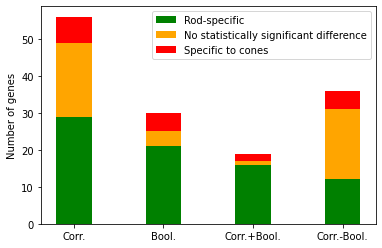

In [829]:
rod_spec = [29,21,16,12]
rod_eq = [20,4,1,19]
cone_spec = [7,5,2,5]

ind = np.arange(0, 2, 0.5)
width = 0.2
print(ind)
cone_spec_bottom = [rod_spec[i]+rod_eq[i] for i in range(len(rod_spec))]

p1 = plt.bar(ind, rod_spec, width, color = "green")
p2 = plt.bar(ind, rod_eq, width,
            bottom=rod_spec, color = "orange")
p3 = plt.bar(ind, cone_spec, width,
            bottom=cone_spec_bottom, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Bool.", "Corr.+Bool.", "Corr.-Bool."])
plt.legend((p1[0], p2[0], p3[0]), ("Rod-specific", "No statistically significant difference", "Specific to cones"))

plt.savefig("/Users/rohan/public_html/Hegemon/rod-celltype.jpg", dpi=800,transparent=True)
plt.show()

### Figure 3C - Validation of Rod or PR-Specific Genes from Boolean Analysis and SRCCA of GSE98556 <a id="f3c"></a>

Validation of Rod or PR Genes from SRCCA (Correlation)

In [45]:
#Remove genes not present in GSE84859
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(phillips_NRL_NR2E3_corr).intersection(genes)

#Specific genes (expression in PRs>expression in retina)
pass_dict = passDict(res, PR, retina, 0.5)

CDR2 NR2E3 PLEKHB1 RP1 PPEF2 RTBDN LSR GNGT1 GNAT1 RBP3 PDE6B PODXL TTC39C CNTRL MTA2 CNGA1 CACNA2D4 RDH12 MSI1 NRL RGS9 ROM1 CDHR1 PDE6G FAM57B PTP4A3 GRK1 UCKL1 IMPG2 ABCA4 UBXN11 AHI1 PFKFB2 AIPL1 SAG JMJD1C CNGB1 CROCC ELOVL4 RHO CASZ1 MAK
42/56
0.75


In [44]:
#Non-specific genes (expression in retina>expression in PRs)
fail_dict = passDict(res, retina, PR, 0.5)

NOL6 NME7
2/56
0.03571428571428571


Validation of Rod or PR Genes from Boolean Analysis

In [46]:
res = set(phillips_PDE6B_NR2E3_bool).intersection(genes)

#Specific genes (expression in PRs>expression in retina)
pass_dict = passDict(res, PR, retina, 0.5)

NR2E3 RP1 PPEF2 GNGT1 RBP3 PDE6B PDE6A TTC39C IMPG1 PODXL GNAT1 CNGA1 SAMD7 LGALSL NRL RGS9 ROM1 PDC SLC6A6 PDE6G GUCA1A ABCA4 USP2 BCO2 AIPL1 SAG PRPH2 USH2A CNGB1 RHO MPP4 CASZ1 DDC STEAP2
34/40
0.85


In [47]:
#Non-specific genes (expression in retina>expression in PRs)
fail_dict = passDict(res, retina, PR, 0.5)

SEPT4
1/40
0.025


Validation of Rod or PR Genes from Intersection of Boolean Analysis and SRCCA (Corr.+Bool.)

In [48]:
res = set(phillips_corr_bool).intersection(genes)

#Specific genes (expression in PRs>expression in retina)
pass_dict = passDict(res, PR, retina, 0.5)

AIPL1 NRL RGS9 ROM1 GNGT1 GNAT1 RBP3 PDE6B NR2E3 TTC39C PODXL SAG PDE6G CNGB1 RHO CASZ1 CNGA1 ABCA4 PPEF2
19/19
1.0


In [49]:
#Non-specific genes (expression in retina>expression in PRs)
fail_dict = passDict(res, retina, PR, 0.5)


0/19
0.0


Validation of Rod or PR Genes from SRCCA and not Boolean Analysis (Corr.-Bool.)

In [50]:
res = set(phillips_NRL_NR2E3_corr).difference(phillips_PDE6B_NR2E3_bool)
#Specific genes (expression in PRs>expression in retina)
pass_dict = passDict(res, PR, retina, 0.5)

CDR2 PLEKHB1 RTBDN LSR CNTRL MTA2 CACNA2D4 RDH12 MSI1 CDHR1 FAM57B PTP4A3 GRK1 UCKL1 IMPG2 UBXN11 AHI1 PFKFB2 JMJD1C CROCC ELOVL4 MAK
22/36
0.6111111111111112


In [51]:
#Non-specific genes (expression in retina>expression in PRs)
fail_dict = passDict(res, retina, PR, 0.5)

NOL6 NME7
2/36
0.05555555555555555


Plot a stacked bar chart with the results:

[0.  0.5 1.  1.5]


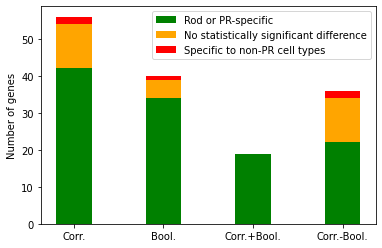

In [830]:
rodpr_spec = [42,34,19,22]
nonpr_spec = [2,1,0,2]
rodpr_eq = [12,5,0,12]

ind = np.arange(0, 2, 0.5)
width = 0.2
print(ind)
nonpr_spec_bottom = [rodpr_spec[i]+rodpr_eq[i] for i in range(len(rodpr_spec))]

p1 = plt.bar(ind, rodpr_spec, width, color = "green")
p2 = plt.bar(ind, rodpr_eq, width,
            bottom=rodpr_spec, color = "orange")
p3 = plt.bar(ind, nonpr_spec, width,
            bottom=nonpr_spec_bottom, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Bool.", "Corr.+Bool.", "Corr.-Bool."])
plt.legend((p1[0], p2[0], p3[0]), ("Rod or PR-specific", "No statistically significant difference", "Specific to non-PR cell types"))
plt.savefig("/Users/rohan/public_html/Hegemon/rod-cellclass.jpg", dpi=800,transparent=True)
plt.show()

### Figure 3D - Validation of Cone-Specific Genes from Boolean Analysis and SRCCA of GSE98556 <a id="f3d"></a>

Gene Lists from Figure 2 for SRCCA and Boolean Analysis:

In [72]:
#Boolean analysis of cones
Arr3_Gnat2_bool_phillips = ['ANKRD33B', 'ARR3', 'C8orf46', 'CERKL', 'EGFLAM', 'FGF12', 'FMN1', 'GNAT2', 'GNGT2', 'GPR180',
                            'HCN1', 'HEG1', 'MAGEE1', 'MAOA', 'MLXIP', 'NDNF', 'PDZD2', 'PEX5L', 'RD3', 'RS1', 'RXRG',
                            'SEMA3C', 'SH3GL2', 'SLC1A7', 'SLC24A2', 'STXBP5L', 'SVOP', 'TRIM59', 'UBAP1L', 'WWC1',
                            'XRCC4']
#SRCCA (Correlational Analysis) of cones
Crx_Prdm1_Rxrg_Thrb_corr_phillips = ['AIPL1','CADM2','CPE','DST', 'FAM123A', 'GUCA1A', 'LPCAT1', 'NEUROD4','PLEKHB1',
                                     'RCVRN', 'RXRG', 'SLC40A1', 'SYT1', 'ANKRD33B', 'CDHR1', 'CPLX4', 'EGFLAM',
                                     'GABRR2', 'IMPG1', 'MAK', 'OTX2','PRDM1', 'RD3', 'SEPT4', 'SLC6A6', 'THRB',
                                     'ARL6', 'CERKL', 'CRX', 'EML1', 'GNAT2', 'IMPG2','MAOA', 'PDC', 'PROM1', 'RP1',
                                     'SGIP1', 'SNAP25', 'UNC119', 'ARR3', 'CHRNA3', 'DCT', 'ENO2','GNB3','KCNV2',
                                     'MPP4', 'PDE6H', 'RAPGEF4', 'RPGRIP1', 'SLC17A7', 'STX3', 'USH2A', 'CACNB2',
                                     'CHRNA5', 'DLG4', 'EYS', 'GNGT2', 'LBH', 'NEUROD1', 'PEX5L', 'RBP3', 'RS1',
                                     'SLC1A7', 'SYP','VTN', 'AKAP9', 'ARMC9', 'C8orf46', 'CADPS', 'FGF12', 'FSTL5',
                                     'ISOC1', 'NCKAP5', 'PRICKLE2', 'SCN3B','SLC38A5', 'TRAK2', 'TUBA4A', 'COBLL1',
                                     'FMN1', 'GALNT13', 'LGALSL', 'NPTX1', 'RALGPS2', 'SEMA3C', 'STXBP5L', 'TRIM36',
                                     'XRCC4', 'FAM57B', 'FRMPD1', 'GPC5', 'MEGF9', 'PCBP4', 'ROBO2', 'SH3GL2', 'TPD52',
                                     'TTC39C'] 

Validation of Cone Genes from SRCCA (Correlation)

In [59]:
#Remove genes not present in GSE84859
Crx_Prdm1_Rxrg_Thrb_corr_phillips_2 = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(genes)

#Specific genes (expression in cones>expression in rods)
pass_dict = passDict(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2, cones, rods, 0.5)

PRDM1 MEGF9 CDHR1 CPE ARR3 AIPL1 NPTX1 SCN3B NEUROD4 ROBO2 GALNT13 PDE6H FSTL5 PRICKLE2 RBP3 THRB GNGT2 GNB3 XRCC4 SNAP25 ENO2 PLEKHB1 SLC1A7 FMN1 FGF12 MAOA SYP GNAT2 RXRG NCKAP5 CADPS RAPGEF4
32/94
0.3404255319148936


In [61]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(Crx_Prdm1_Rxrg_Thrb_corr_phillips_2, rods, cones, 0.5)

CACNB2 RP1 PDC FAM57B VTN KCNV2 RS1 RCVRN NEUROD1 CADM2 RPGRIP1 TTC39C AKAP9 TPD52 CHRNA5 UNC119 ARMC9 PEX5L PROM1 ANKRD33B LPCAT1 OTX2 TRIM36 FRMPD1 CPLX4 PCBP4
26/94
0.2765957446808511


Validation of Cone Genes from Boolean Analysis

In [64]:
#Remove genes not present in GSE84859
genes = [h.getName(i).upper() for i in h.getAllIDs()]
res = set(Arr3_Gnat2_bool_phillips).intersection(genes)

#Specific genes (expression in cones>expression in rods)
boolean_dict = passDict(res, cones, rods, 0.5)

SLC1A7 MLXIP NDNF FMN1 FGF12 MAGEE1 GNGT2 MAOA SLC24A2 ARR3 GNAT2 RXRG WWC1 TRIM59 XRCC4
15/30
0.5


In [65]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(res, rods, cones, 0.5)

HCN1 PEX5L ANKRD33B RS1
4/30
0.13333333333333333


Validation of Cones Genes from Intersection of SRCCA and Boolean Analysis (Corr.+Bool.)

In [70]:
lst = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).intersection(Arr3_Gnat2_bool_phillips)
res = set(lst).intersection(genes)

#Specific genes (expression in cones>expression in rods)
pass_dict = passDict(res, cones, rods, 0.5)

GNAT2 GNGT2 XRCC4 SLC1A7 MAOA ARR3 FMN1 FGF12 RXRG
9/18
0.5


In [71]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(res, rods, cones, 0.5)

PEX5L RS1 ANKRD33B
3/18
0.16666666666666666


Validation of Cones Genes from SRCCA and not Boolean Analysis (Corr.-Bool.)

In [68]:
lst = set(Crx_Prdm1_Rxrg_Thrb_corr_phillips).difference(Arr3_Gnat2_bool_phillips)
res = set(lst).intersection(genes)

#Specific genes (expression in cones>expression in rods)
pass_dict = passDict(res, cones, rods, 0.5)

ENO2 SCN3B PRDM1 NEUROD4 PLEKHB1 MEGF9 ROBO2 GALNT13 PDE6H RBP3 THRB CDHR1 CPE FSTL5 SYP GNB3 PRICKLE2 AIPL1 NCKAP5 CADPS NPTX1 RAPGEF4 SNAP25
23/76
0.3026315789473684


In [69]:
#Non-specific genes (expression in cones>expression in rods)
fail_dict = passDict(res, rods, cones, 0.5)

UNC119 RCVRN NEUROD1 ARMC9 CADM2 CHRNA5 CACNB2 RP1 RPGRIP1 TTC39C FRMPD1 CPLX4 PROM1 TPD52 PDC AKAP9 FAM57B VTN LPCAT1 PCBP4 OTX2 KCNV2 TRIM36
23/76
0.3026315789473684


Plot a stacked bar chart with the results:

[0.  0.5 1.  1.5]


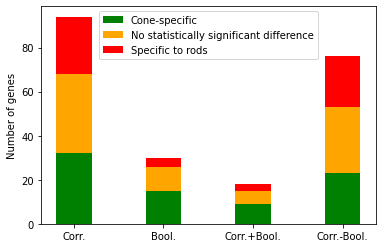

In [831]:
cone_spec = [32,15,9,23]
rod_spec = [26,4,3,23]
cone_eq = [36,11,6,30]

ind = np.arange(0, 2, 0.5)
width = 0.2
print(ind)
rod_spec_bottom = [cone_spec[i]+cone_eq[i] for i in range(len(cone_spec))]

p1 = plt.bar(ind, cone_spec, width, color = "green")
p2 = plt.bar(ind, cone_eq, width,
            bottom=cone_spec, color = "orange")
p3 = plt.bar(ind, rod_spec, width,
            bottom=rod_spec_bottom, color = "red")

plt.ylabel("Number of genes")
plt.xticks(ind, ["Corr.", "Bool.", "Corr.+Bool.", "Corr.-Bool."])
plt.legend((p1[0], p2[0], p3[0]), ("Cone-specific", "No statistically significant difference", "Specific to rods"))
plt.savefig("/Users/rohan/public_html/Hegemon/cone-cellclass.jpg", dpi=800,transparent=True)
plt.show()

Two-proportion z-tests as seen in Figure 3B-E were conducted using R version 4.0.1. 

### Figure 3E - Validation of Cone and Rod-Specific Genes from Boolean Analysis of GSE63472 <a id="f3e"></a>

##### Validation of Cone Genes (bait genes ARR3 and GNAT2) from Boolean Analysis

Specific Cone Genes vs. Rods (expression in cones>expression in rods)

In [75]:
res3 = ['GNGT2', 'KCNE2', 'PDE6C', 'CD59A', 'GNAT2', 'PDE6H', 'OPN1SW', 'ARR3', 'OPN1MW']

#Specific genes (expression in cones>expression in rods)
macosko_cones_pass_dict = passDict(res3, cones, rods, 0.5)

GNGT2 KCNE2 PDE6C CD59A GNAT2 PDE6H OPN1SW ARR3 OPN1MW
9/9
1.0


Specific Cone Genes vs. Retina (expression in cones>expression in retina)

In [74]:
macosko_cones_pass_dict_all = passDict(res3, cones, retina, 0.5)

GNGT2 KCNE2 PDE6C CD59A GNAT2 PDE6H OPN1SW ARR3 OPN1MW
9/9
1.0


##### Validation of Rod Genes (bait genes PDE6B and NR2E3) from Boolean Analysis

Specific Rod Genes vs. Cones (expression in cones>expression in rods)

In [77]:
res4 = ['PDE6G', 'RCVRN', 'UNC119', 'RPGRIP1', 'NRL', 'TULP1', 'PRPH2', 'ROM1', 'PDC', 'RP1', 'SAG', 'CST3', 'GNB1', 'PDE6B', 'CNGA1', 'RHO', 'GNGT1', 'GNAT1', 'NR2E3', 'SLC24A1', 'RS1']

#Specific genes (expression in rods>expression in cones)
macosko_rods_pass_dict = passDict(res4, rods, cones, 0.5)

PDE6G RCVRN UNC119 RPGRIP1 NRL PRPH2 ROM1 PDC RP1 SAG CST3 GNB1 PDE6B CNGA1 RHO GNGT1 GNAT1 NR2E3 SLC24A1 RS1
20/21
0.9523809523809523


Specific Rod Genes vs. Retina (expression in cones>expression in retina)

In [78]:
macosko_rods_pass_dict2 = passDict(res4, rods, retina, 0.5)

PDE6G RCVRN UNC119 RPGRIP1 NRL TULP1 PRPH2 ROM1 PDC RP1 SAG CST3 GNB1 PDE6B CNGA1 RHO GNGT1 GNAT1 NR2E3 SLC24A1 RS1
21/21
1.0


Plot stacked bar chart with the results:

[ 0  8 16 24]


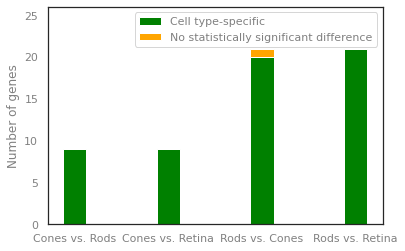

In [138]:
spec = [9,9,20,21]
eq = [0,0,1,0]

ind = np.arange(0, 32, 8)
width = 2
print(ind)
eq_bottom = [spec[i] for i in range(len(spec))]

fig,ax = plt.subplots()
p1 = plt.bar(ind, spec, width, color = "green")
p2 = plt.bar(ind, eq, width,
            bottom=spec, color = "orange")


plt.ylabel("Number of genes")
plt.xticks(ind, ["Cones vs. Rods", "Cones vs. Retina", "Rods vs. Cones", "Rods vs. Retina"])
plt.legend((p1[0], p2[0]), ("Cell type-specific", "No statistically significant difference"))
ax.set(ylim=(0,26))

plt.savefig("/Users/rohan/public_html/Hegemon/macosko.pdf")
plt.show()

## Figure 4 - Specific Examples <a id="f4"></a>

### Violin Plots in GSE84859 (left column) <a id="f4a"></a>

In [99]:
%run /Users/rohan/public_html/Hegemon/bone.py

<Figure size 432x288 with 0 Axes>

Import data from GSE84859 and define groups by cell types:

In [79]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT40"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

atype = h.getSurvName("c tissue")
print(hu.uniq(atype))
cones = [i for i in h.aRange() if atype[i] == "Cones"]
rods = [i for i in h.aRange() if atype[i] == "Rods"]
amacrine = [i for i in h.aRange() if atype[i] == "Starbust amacrine cells"]
horizontal = [i for i in h.aRange() if atype[i] == "Horizontal Cells"]

[27, 'c tissue', 'Horizontal Cells', 'Starbust amacrine cells', 'Rods', 'Cones']


Functions to generate violin plots:

In [99]:
def makeDF(geneName):
    Arr3 = h.getExprData(geneName)
    Arr3_cones = np.array([float(Arr3[i]) for i in cones])
    Arr3_rods = np.array([float(Arr3[i]) for i in rods])
    Arr3_amacrine = np.array([float(Arr3[i]) for i in amacrine])
    Arr3_horizontal = np.array([float(Arr3[i]) for i in horizontal])
    data = [Arr3_cones, Arr3_rods, Arr3_amacrine, Arr3_horizontal]
    Arr3_conedf = pd.DataFrame(data)
    Arr3_conedf = Arr3_conedf.transpose()
    return(Arr3_conedf)

def saveViolin(geneName, acolor):
    arr3 = makeDF(geneName)
    params = {"dpi":150, "w":2.25*2.5, "h":2*2.5, "acolor":acolor, "vert":1}
    atypes = ["Cones", "Rods", "SA", "HZ"]
    arr3_plot = plotViolin2(arr3, atypes, params)
    return(arr3_plot)

<Figure size 432x288 with 0 Axes>

4
4
4
4


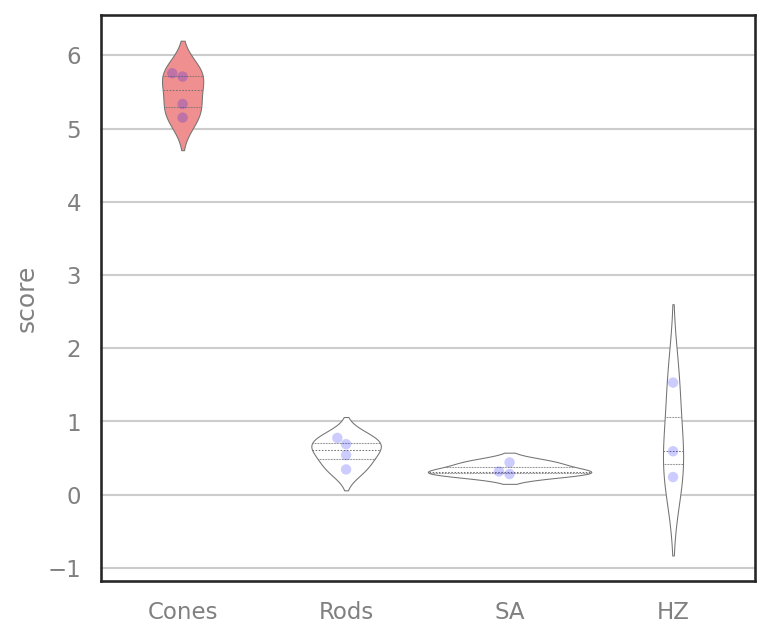

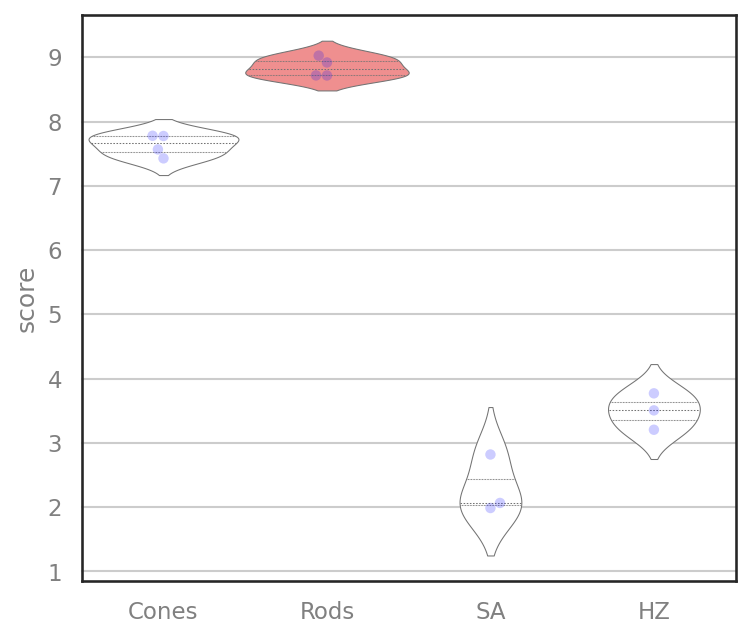

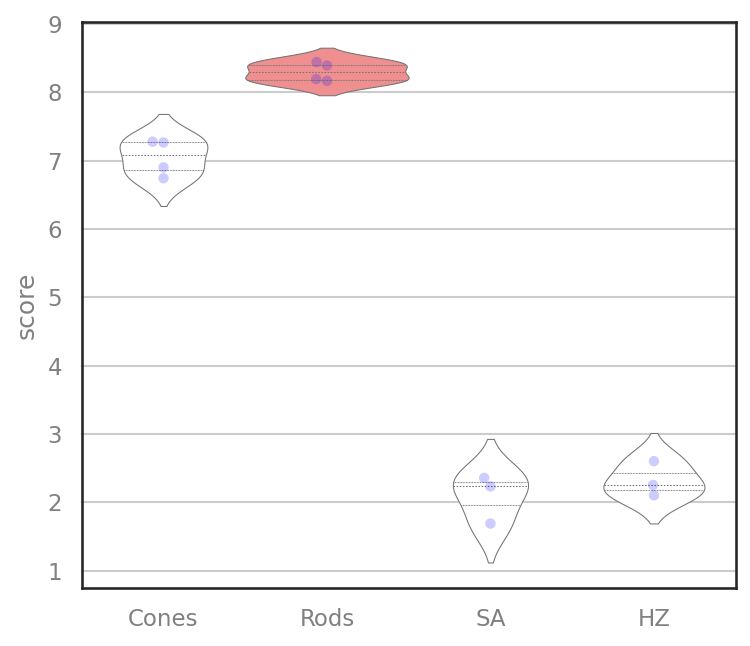

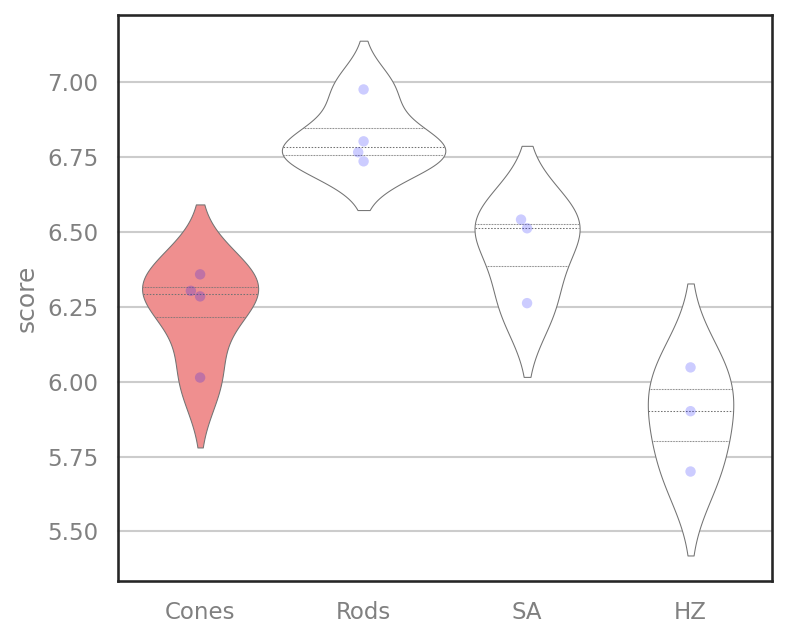

In [132]:
hartl_pdf = PdfPages("hartlPlotsBONE3.pdf")

#Figure 4A
wwc1_hartl = saveViolin("WWC1",["red","white","white", "white"])
#Figure 4B
casz1_hartl = saveViolin("CASZ1",["white","red","white", "white"])
#Figure 4C
ppef2_hartl = saveViolin("PPEF2",["white","red","white", "white"])
#Figure 4D
akap9_hartl = saveViolin("AKAP9",["red","white","white", "white"])

hartl_pdf.savefig(wwc1_hartl)
hartl_pdf.savefig(casz1_hartl)
hartl_pdf.savefig(ppef2_hartl)
hartl_pdf.savefig(akap9_hartl)
hartl_pdf.close()

### Violin Plots in GSE98838 (central column) <a id="f4b"></a>

Import data from GSE98838 and define groups by cell types:

In [80]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT41"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

atype = h.getSurvName("c cell type")
print(hu.uniq(atype))
cones = [i for i in h.aRange() if atype[i] == "Cones"]
rods = [i for i in h.aRange() if atype[i] == "Rods"]
cbipolar = [i for i in h.aRange() if atype[i] == "Cone_bipolars"]
rbipolar = [i for i in h.aRange() if atype[i] == "Rod_bipolars"]
bipolar = [i for i in h.aRange() if atype[i] == "Bipolars"]

[7, 'c cell type', 'Rods', 'Cones', 'Bipolars', 'Rod_bipolars', 'Cone_bipolars']


Functions to generate violin plots:

In [81]:
def makeDF(geneName):
    expr = h.getExprData(geneName)
    expr_cones = np.array([float(expr[i]) for i in cones])
    expr_rods = np.array([float(expr[i]) for i in rods])
    expr_cbipolar = np.array([float(expr[i]) for i in cbipolar])
    expr_rbipolar = np.array([float(expr[i]) for i in rbipolar])
    expr_bipolar = np.array([float(expr[i]) for i in bipolar])   
    data = [expr_cones, expr_rods, expr_bipolar,expr_cbipolar, expr_rbipolar]
    expr_df = pd.DataFrame(data)
    expr_df = expr_df.transpose()
    return(expr_df)

def saveViolin(geneName, acolor):
    arr3 = makeDF(geneName)
    params = {"dpi":150, "h":2*3, "w":2.25*3, "acolor":acolor, 'vert':1}
    atypes = ["Cones", "Rods", "CBP", "RBP", "BP"]
    arr3_plot = plotViolin3(arr3, 5, atypes, params)
    return(arr3_plot)

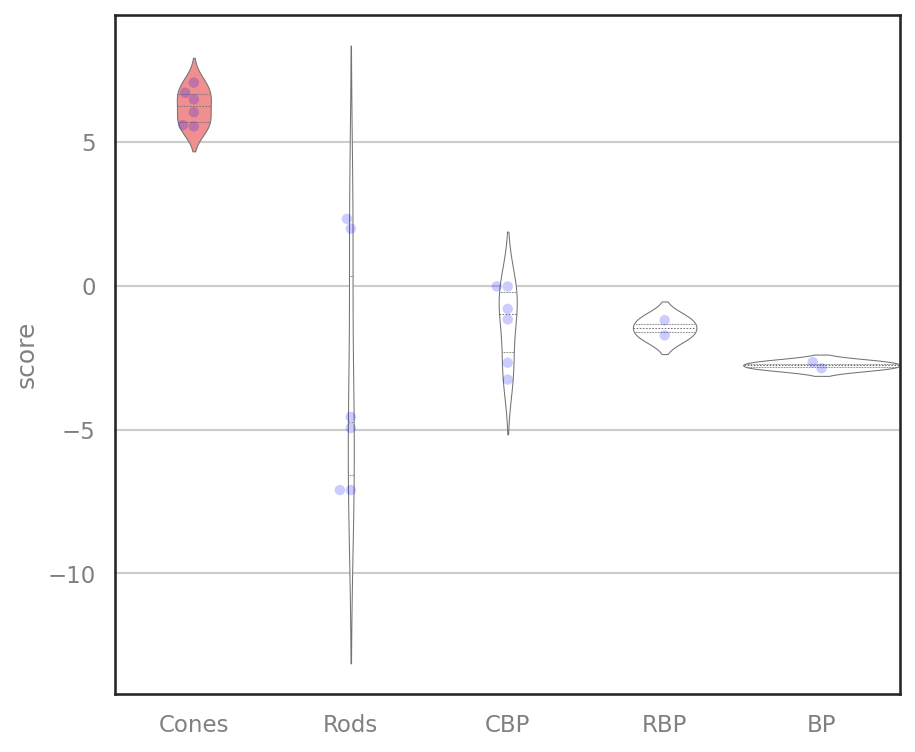

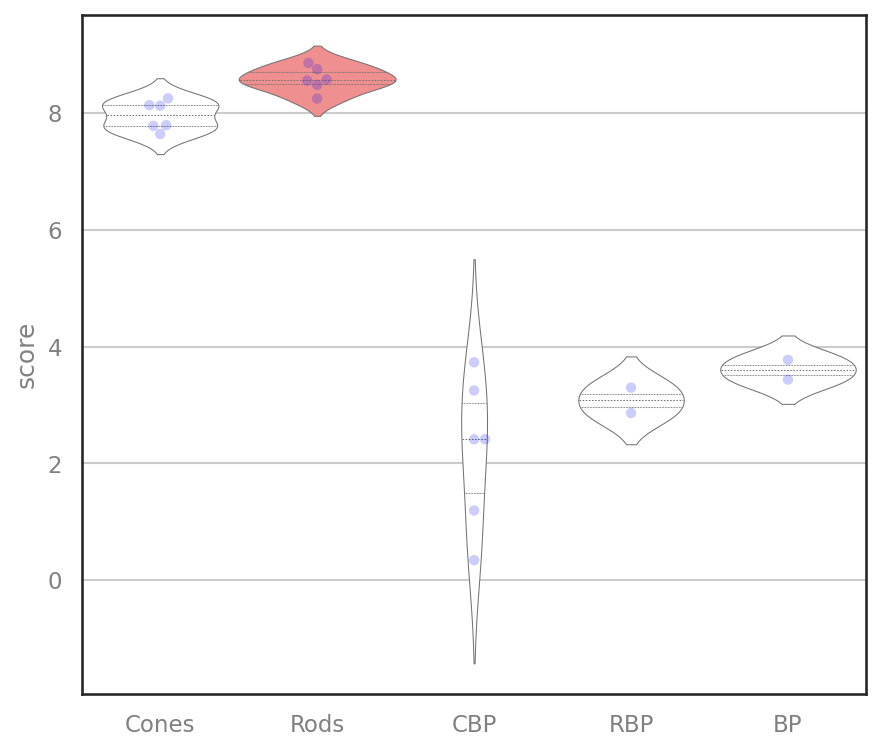

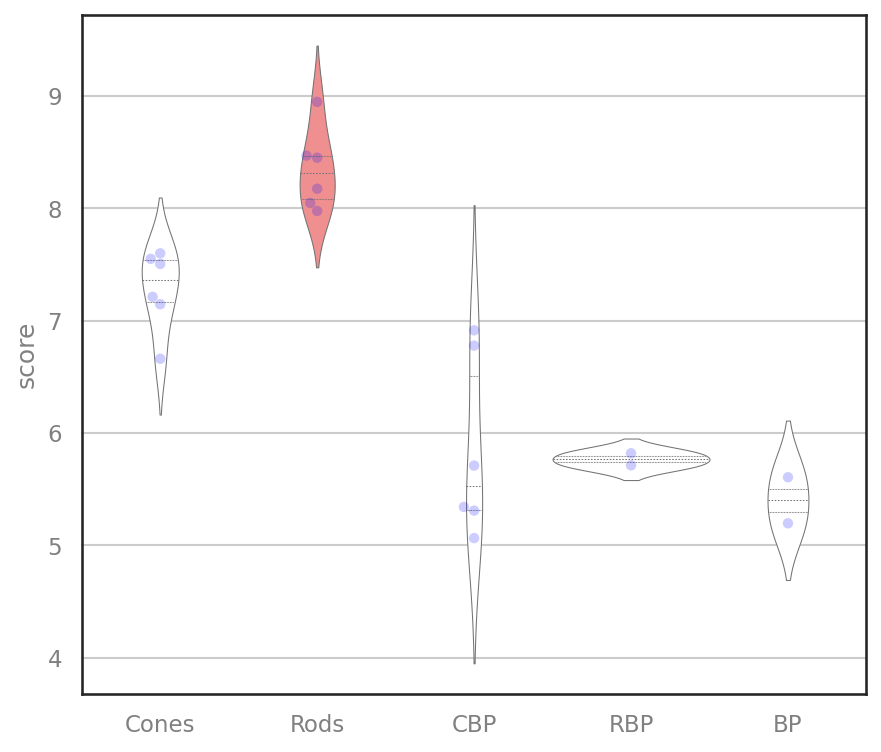

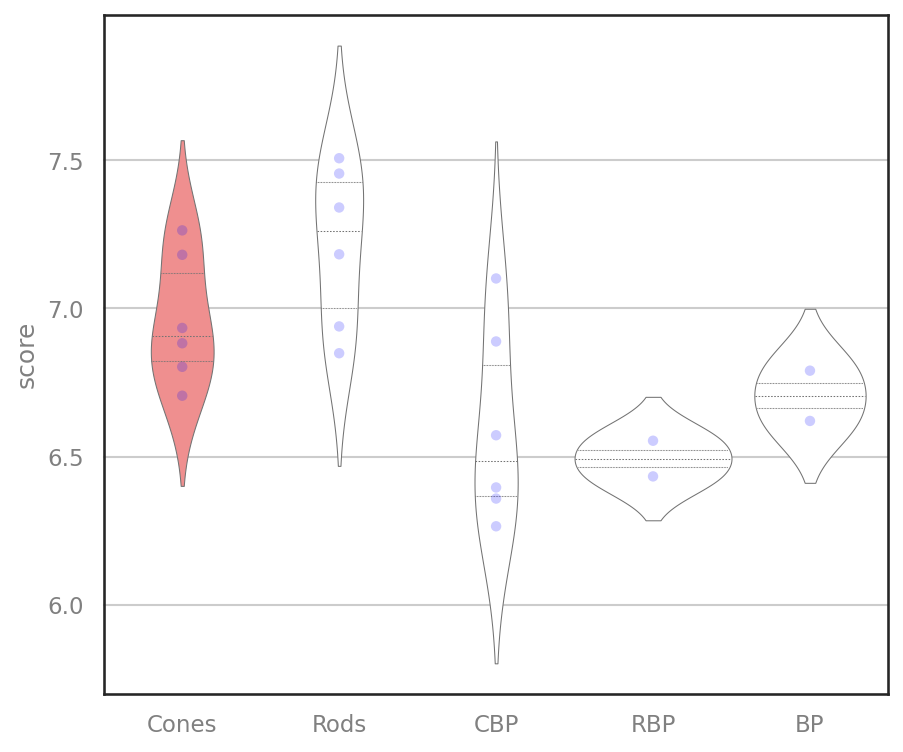

In [130]:
sarin_pdf = PdfPages("sarinPlotsBONE3.pdf")

#Figure 4A
wwc1_sarin = saveViolin("WWC1",["red","white","white", "white", "white"])
#Figure 4B
casz1_sarin = saveViolin("CASZ1",["white","red","white", "white", "white"])
#Figure 4C
ppef2_sarin = saveViolin("PPEF2",["white","red","white", "white", "white"])
#Figure 4D
akap9_sarin = saveViolin("AKAP9",["red","white","white", "white", "white"])

sarin_pdf.savefig(wwc1_sarin)
sarin_pdf.savefig(casz1_sarin)
sarin_pdf.savefig(ppef2_sarin)
sarin_pdf.savefig(akap9_sarin)
sarin_pdf.close()

### Violin Plots in GSE130636 (right column) <a id="f4c"></a>

Convert Hegemon object to Scanpy object (AnnData):

In [82]:
def toScanpy(h):
    df1 = pd.read_csv(h.getExprFile(), sep="\t")
    adata = sc.AnnData(df1[df1.columns[2:]].T)
    adata.obs['arr'] = list(df1.columns[2:])
    adata.var['gene_ids'] = [str(i) for i in df1[df1.columns[0]]]
    adata.var['gene_symbols'] = [str(i) for i in df1[df1.columns[1]]]
    adata.var_names = list(adata.var['gene_symbols'])
    df = pd.read_csv(h.getSurv(), sep="\t")
    df.index = df.iloc[:,0]
    for k in df.columns:
        k1 = re.sub("^c ", "", k)
        k1 = re.sub("^n ", "", k1)
        val = [df[k][i] if i in df.index else '' for i in adata.obs['arr']]
        adata.obs[k1] = val
    return df1, adata

In [67]:
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
dbid = "RT42"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
adata2 = toScanpy(h)
adata = adata2[1]

Create groups by cell type:

In [ ]:
cell_group = []

for i in adata.obs["cell type"]:
    if i == 'Cone 3' or i == 'Cone 4':
        cell_group.append("Cone")
    elif i == 'Rod 1' or i == 'Rod 2':
        cell_group.append("Rod")
    elif i == "Bipolar Cell 1" or i == "Bipolar Cell 2":
        cell_group.append("BP")
    elif i == "Glial Cell 1" or i == "Glial Cell 2" or i == "Glial Cell 3" or i == "Glial Cell 4" or i == "Glial Cell 5":
        cell_group.append("Glial")
    elif i == 'Horizontal Cell':
        cell_group.append("HZ")
    elif i == 'Endothelial Cell':
        cell_group.append("ET")
    elif i == 'Pericyte':
        cell_group.append("Pericyte")
    elif i == 'Retinal Ganglion Cell':
        cell_group.append("Ganglion")
    elif i == 'Amacrine Cell':
        cell_group.append("Amacrine")
    else:
        cell_group.append(i)
        
adata.obs["cell group"] = cell_group

Generate violin plots:

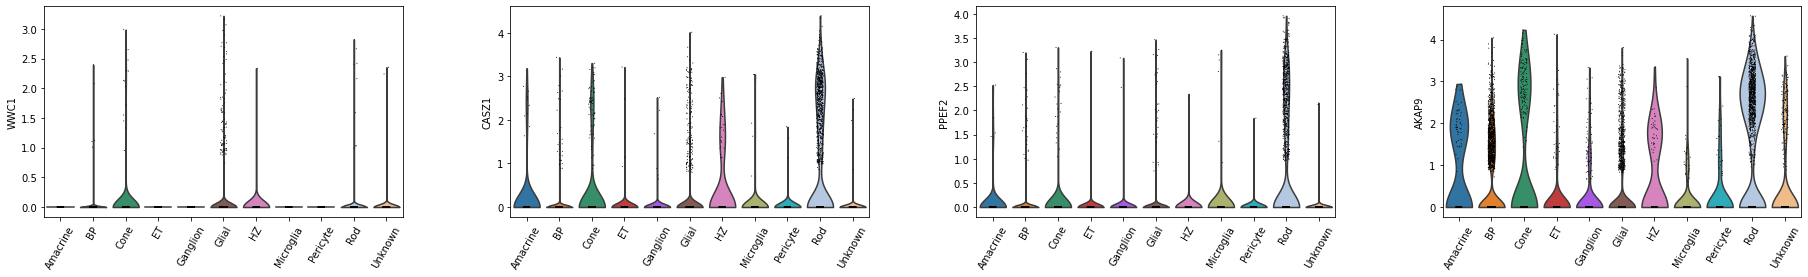

In [122]:
sc.pl.violin(adata3, ["WWC1","CASZ1","PPEF2","AKAP9"], groupby="cell group", rotation=60, save="voigt_SCplots.pdf")

### Figure S1
<a id="fs1"></a>

In [6]:
# FDR and stats file obtained by running /Users/rohan/public_html/Hegemon/Data2/Data/Analysis/FDR/fdr-GSE98556.sh
pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/Analysis/FDR/"
phillips_stats = pd.DataFrame(pd.read_csv(pathdir+"phillips-2018-retina-stats.txt", sep="\t", skiprows = 2, header = 0))

In [11]:
# Compute false discovery rate for GSE98556 with thresholds Sthr 2.5 and pthr 0.35
with open(pathdir+'Random-phillips-1/original.pairs') as f:
    original_lines = f.readlines()

fdr = []
for i in range(5):
    with open(pathdir+'Random-phillips-1/flu-' + str(i) + '.pairs') as f:
        lines = f.readlines()
        print("fdr :: ",i,len(lines)/len(original_lines))
        fdr.append(len(lines)/len(original_lines))

print(np.mean(fdr))

fdr ::  0 0.0009501660162638153
fdr ::  1 0.000961751339129103
fdr ::  2 0.000964011889932086
fdr ::  3 0.0009532177598478423
fdr ::  4 0.0009592082194757472
0.0009576710449297188


In [7]:
# Total number of Boolean implication relationships
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
phillips_stats["total"] = phillips_stats.loc[:, col_array].sum(axis=1)
print(sum(phillips_stats["total"])//2)

35389605


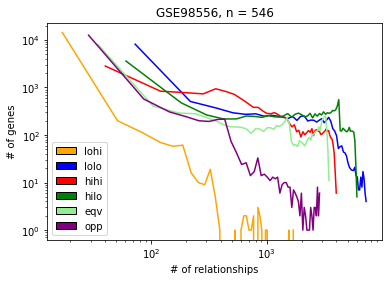

In [8]:
# Figure S1K
fig,ax = plt.subplots()
col_array = ["lohi", "lolo", "hihi", "hilo", "eqv", "opp"]
colors = ["orange", "blue", "red", "green", "#90EE90", "purple"]

for i in range(len(col_array)):
    phillips_BIN_stats = phillips_stats.loc[:, col_array[i]]
    counts,bins,bars = plt.hist(phillips_BIN_stats, bins = 50, histtype=u'step')
    bin_centers = 0.5*(bins[1:]+bins[:-1])
    plt.plot(bin_centers, counts, colors[i]) ## using bin_centers rather than edges
    t = [b.remove() for b in bars]

handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in colors]
plt.legend(handles, col_array)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylabel('# of genes')
ax.set_xlabel('# of relationships')
ax.set_title('GSE98556, n = 546')
plt.show()

phillips_stats_pdf = PdfPages("phillips_stats.pdf")
phillips_stats_pdf.savefig(fig)
phillips_stats_pdf.close()

### Figure S2
<a id="fs2v2"></a>

#### Figure S2A
<a id="s2v2a"></a>

In [4]:
def types_dict(path, sep=',', header=0):
    df = pd.read_csv(path, nrows=3, sep=sep, header=header)
    for i in df.columns[1:]:
        df[i] = pd.to_numeric(df[i], downcast='unsigned')
    dtypes = df.dtypes
    colnames = dtypes.index
    types = [i.name for i in dtypes.values]
    column_types = dict(zip(colnames, types))
    return(column_types)

In [8]:
#Format data
pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE148077/rawData/"

i='GSE148077_count_mat_donor_H1.csv'
print("starting "+i)
typedict=types_dict(pathdir+i, sep=',', header=0)
print("dict")
expr = pd.DataFrame(pd.read_csv(pathdir+i, sep = ',', header=0, dtype=typedict))   
print("read")
print("finished "+i)

files = ['GSE148077_count_mat_donor_H2.csv','GSE148077_count_mat_donor_H3.csv',\
         'GSE148077_count_mat_donor_H4.csv', 'GSE148077_count_mat_donor_H5.csv', \
         'GSE148077_count_mat_donor_H9.csv','GSE148077_count_mat_donor_H11.csv']

for i in files:
    print("starting "+i)
    typedict=types_dict(pathdir+i, sep=',', header=0)
    print("dict")
    df = pd.DataFrame(pd.read_csv(pathdir+i, sep = ',', header=0, dtype=typedict))   
    print("read")
    expr = pd.merge(expr, df, on='Unnamed: 0', how="inner")
    print("merged")
    print("finished "+i)

genes = pd.DataFrame()
genes["ProbeID"] = expr['Unnamed: 0']
genes["Name"] = expr['Unnamed: 0']

count_mtx=expr.iloc[:,1:]
adata = sc.AnnData(count_mtx.T)
print("adata tranformed")

pathdir = "/Users/rohan/public_html/Hegemon/Data2/Data/GSE148077"

adata.obs['arr'] = np.array(count_mtx.columns)
adata.var['gene_names'] = np.array(expr["Unnamed: 0"])
adata.var_names = adata.var["gene_names"]
adata.obs_names = adata.obs["arr"]
df = pd.read_csv(pathdir+"/GSE148077-GPL16791-2-survival.txt", sep="\t")
print("Read surv file")
df.index = df.iloc[:,0]
for k in df.columns:
    k1 = re.sub("^c ", "", k)
    k1 = re.sub("^n ", "", k1)
    val = [df[k][i] if i in df.index else '' for i in adata.obs['arr']]
    adata.obs[k1] = val
    print("read column "+k)
    
genes_mtx = expr.loc[(expr["Unnamed: 0"] == "WWC1") | (expr["Unnamed: 0"] == "PPEF2") | (expr["Unnamed: 0"] == "CASZ1") | (expr["Unnamed: 0"] == "AKAP9") | (expr["Unnamed: 0"] == "ARR3")] 
genes_mtx
df = pd.DataFrame(adata.obs['cell type']).T
df["Unnamed: 0"] = "cell type"
genes_mtx = pd.concat([genes_mtx,df],axis=0)
genes_mtx = genes_mtx.T
genes_mtx.columns = genes_mtx.iloc[-1,]
genes_mtx = genes_mtx.drop("Unnamed: 0", axis=0)

starting GSE148077_count_mat_donor_H1.csv
dict
read
finished GSE148077_count_mat_donor_H1.csv
starting GSE148077_count_mat_donor_H2.csv
dict
read
merged
finished GSE148077_count_mat_donor_H2.csv
starting GSE148077_count_mat_donor_H3.csv
dict
read
merged
finished GSE148077_count_mat_donor_H3.csv
starting GSE148077_count_mat_donor_H4.csv
dict
read
merged
finished GSE148077_count_mat_donor_H4.csv
starting GSE148077_count_mat_donor_H5.csv
dict
merged
finished GSE148077_count_mat_donor_H5.csv
starting GSE148077_count_mat_donor_H9.csv
dict
read
merged
finished GSE148077_count_mat_donor_H9.csv
starting GSE148077_count_mat_donor_H11.csv
dict
read
merged
finished GSE148077_count_mat_donor_H11.csv


/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


adata tranformed
Read surv file
read column ArrayID
read column time
read column status
read column c title
read column c source_name
read column c organism
read column c type
read column c molecule
read column c cluster
read column c cell type


AnnData object with n_obs × n_vars = 86253 × 33660
    obs: 'arr', 'ArrayID', 'time', 'status', 'title', 'source_name', 'organism', 'type', 'molecule', 'cluster', 'cell type'
    var: 'gene_names'

In [ ]:
#df: matrix of raw counts with genes as column names and "cell type" as a column
def pseudoBulk(df):
    cell_type = np.unique(np.array(df["cell type"]))
    pbDF = pd.DataFrame()
    for i in cell_type:
        print(i)
        tempdf = df.loc[df["cell type"] == i]
        tempdf = tempdf.drop("cell type", axis=1)
        pbDF[i+"_PB"] = tempdf.sum(axis=0, skipna=True)
    adata = sc.AnnData(pbDF.T)
    sc.pp.normalize_total(adata, target_sum=1e6,exclude_highly_expressed=True)
    adata.obs['cell_type'] = np.array(pbDF.columns)
    adata.var['gene_names'] = np.array(pbDF.index)
    adata.var_names = adata.var["gene_names"]
    adata.obs_names = adata.obs['cell_type']
    return(pbDF, adata)

pseudoBulk = pseudoBulk(genes_mtx)
df = pd.DataFrame(pseudoBulk[1].X)
df.columns = pseudoBulk[1].var_names
df.index = pseudoBulk[1].obs_names
df["cell_type"] = df.index

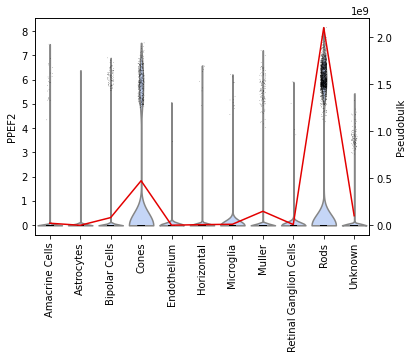

In [248]:
#Normalise complete anndata
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
print("normalized")

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = ['Amacrine Cells', 'Astrocytes', 'Bipolar Cells', 'Cones','Endothelium', 'Horizontal', 'Microglia', 'Muller','Retinal Ganglion Cells', 'Rods', 'Unknown']
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line.jpeg", dpi=900,bbox_inches="tight")


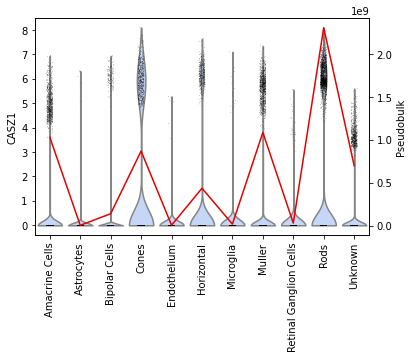

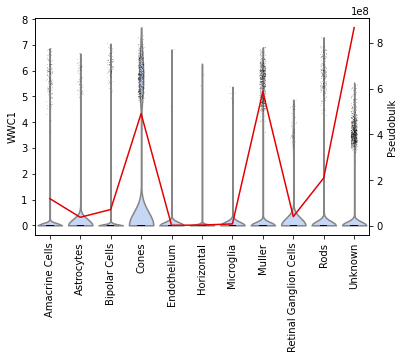

In [249]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
sc.pl.violin(adata, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line", dpi=800,bbox_inches="tight")

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
sc.pl.violin(adata, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line", dpi=800,bbox_inches="tight")

#### Figure S2B
<a id="s2v2b"></a>

In [ ]:
pathdir="/Users/rohan/public_html/Hegemon/Data2/Data/GSE138002/"
print("reading barcodes")
barcodes = pd.DataFrame(pd.read_csv(pathdir+'GSE138002_Final_barcodes.csv', sep = ';', header=0))
print("finished")
print("reading genes")
genes = pd.DataFrame(pd.read_csv(pathdir+'GSE138002_genes.csv', sep = ';',header=0))
genes.columns = ["ProbeID1","ProbeID","Name"]
genes = genes[["ProbeID","Name"]]
print("finished")
print("reading counts")
adata_lu = (scipy.io.mmread(pathdir+'GSE138002_Final_matrix.mtx'))
adata_lu = adata_lu.todense()
adata_lu = pd.DataFrame(adata_lu)
print("finished")
print("normalizing")
adata_lu = sc.AnnData(adata_lu.T)
adata_lu.obs['arr'] = np.array(barcodes['barcode'])
adata_lu.var['gene_ids']=np.array(genes["ProbeID"])
adata_lu.var['names']=np.array(genes["Name"])

db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT59"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
print("Loaded hegemon object")

df = pd.read_csv(h.getSurv(), sep="\t")
print("Read surv file")
df.index = df.iloc[:,0]
for k in df.columns:
    k1 = re.sub("^c ", "", k)
    k1 = re.sub("^n ", "", k1)
    val = [df[k][i] if i in df.index else '' for i in adata_lu.obs['arr']]
    adata_lu.obs[k1] = val
    print("read column")
    
adata_lu.var_names = adata_lu.var["names"]
adata_lu.obs_names = adata_lu.obs["arr"]

celltype = list(adata_lu.obs["cell type"])
for i in range(len(celltype)):
    if celltype[i] == "Amacrine Cells":
        celltype[i] = "AC"
print(np.unique(celltype))
adata_lu.obs["celltype"] = celltype

In [ ]:
#Retinal_Cells
adata_lu_sub = adata_lu[adata_lu.obs['source_name'].isin(['Retinal Cells']),:] 
expr_lu = pd.DataFrame(adata_lu_sub.X)
expr_lu.columns = adata_lu_sub.var_names
expr_lu.index = adata_lu_sub.obs_names
expr_lu["cell type"] = adata_lu_sub.obs["cell type"]
expr_lu["source"] = adata_lu_sub.obs["source_name"]
expr_lu = expr_lu.drop("source", axis=1)
cols = ["WWC1", "PPEF2", "CASZ1", "AKAP9", "ARR3", "celltype"]
expr_lu = expr_lu[cols]
retinal_lu_PB = pseudoBulk(expr_lu)
df = pd.DataFrame(retinal_lu_PB[1].X)
df.columns = retinal_lu_PB[1].var_names
df.index = retinal_lu_PB[1].obs_names
df["cell type"] = df.index

starting gse138002


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalized


... storing 'title' as categorical
... storing 'cell source' as categorical
... storing 'developmental stage' as categorical
... storing 'molecule' as categorical
... storing 'organism' as categorical
... storing 'source_name' as categorical
... storing 'tissue' as categorical
... storing 'age' as categorical
... storing 'sample_region' as categorical
... storing 'cell type' as categorical
... storing 'celltype' as categorical
... storing 'celltype_RC' as categorical
... storing 'celltype_EC' as categorical
... storing 'celltype_NN' as categorical
... storing 'names' as categorical


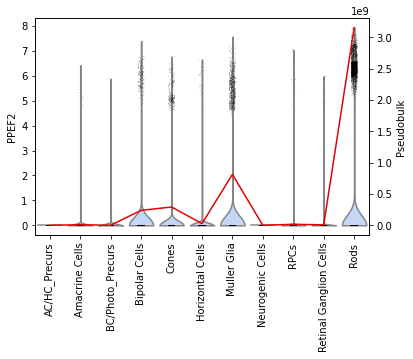

ppef2


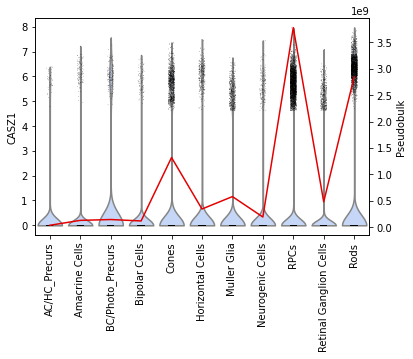

casz1


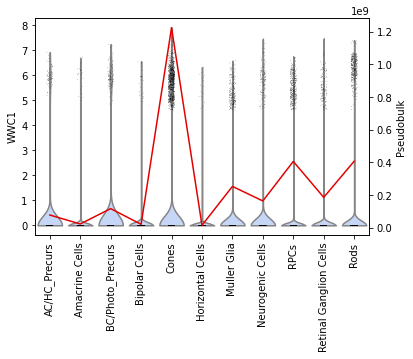

wwc1
starting gse116106
subsetted


KeyError: "['celltype'] not in index"

In [302]:
#Retinal Cells GSE138002
print("starting gse138002")
sc.pp.normalize_total(adata_lu_sub, target_sum=1e6)
sc.pp.log1p(adata_lu_sub)
print("normalized")

##PPEF2

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = [i.split(sep="_")[0] for i in np.unique(df.index)]
my_xticks[0] = "AC/HC Precurs"
my_xticks[2] = "BC/Photo Precurs"
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata_lu_sub, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line_GSE138002.jpeg", dpi=900,bbox_inches="tight")
print("ppef2")
##CASZ1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line_GSE138002.jpeg", dpi=900,bbox_inches="tight")
print("casz1")
##WWC1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line_GSE138002.jpeg", dpi=900,bbox_inches="tight")
print("wwc1")

#### Figure S2C
<a id="s2v2c"></a>

starting gse122970
subsetted
df ready
Amacrine Cells
Bipolar Cells
Cones
Horizontal Cells
Muller Glia
RPCs
Rods
pseudobulk complete
pbdf ready


/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalized anndata


... storing 'title' as categorical
... storing 'cell source' as categorical
... storing 'developmental stage' as categorical
... storing 'molecule' as categorical
... storing 'organism' as categorical
... storing 'source_name' as categorical
... storing 'tissue' as categorical
... storing 'age' as categorical
... storing 'sample_region' as categorical
... storing 'cell type' as categorical
... storing 'celltype' as categorical
... storing 'celltype_RC' as categorical
... storing 'celltype_EC' as categorical
... storing 'celltype_NN' as categorical
... storing 'names' as categorical


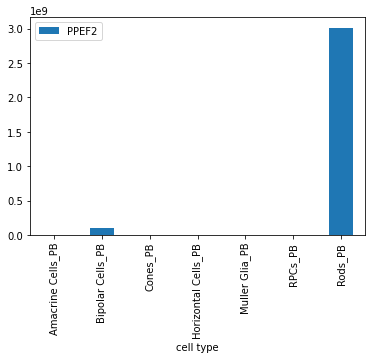

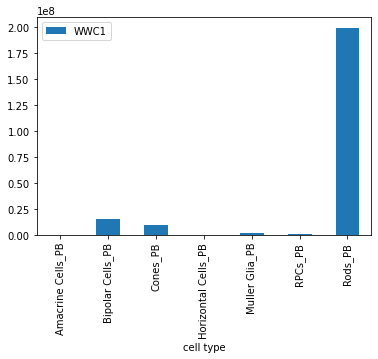

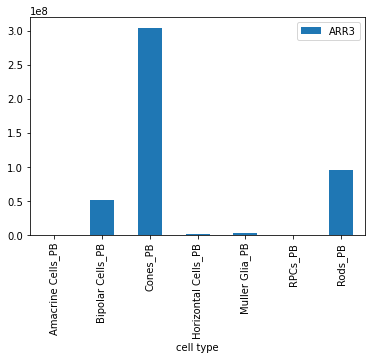

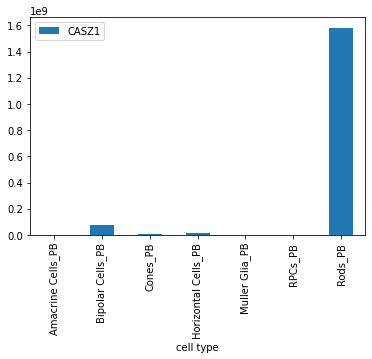

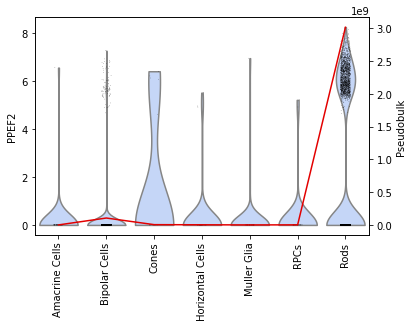

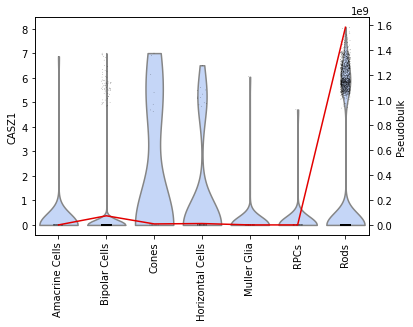

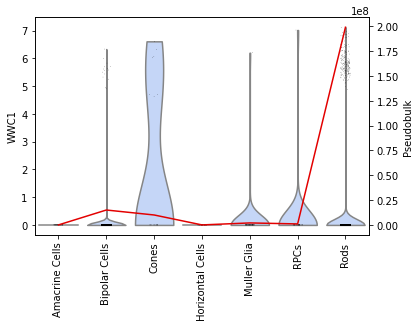

finished gse122970


In [308]:
print("starting gse122970")
#Neonatal Cells GSE122970
adata_lu_sub = adata_lu[adata_lu.obs['source_name'].isin(["human neonatal retina"]),:] 
print("subsetted")
expr_lu = pd.DataFrame(adata_lu_sub.X)
expr_lu.columns = adata_lu_sub.var_names
expr_lu.index = adata_lu_sub.obs_names
expr_lu["cell type"] = adata_lu_sub.obs["cell type"]
expr_lu["source"] = adata_lu_sub.obs["source_name"]
expr_lu = expr_lu.drop("source", axis=1)
cols = ["WWC1", "PPEF2", "CASZ1", "AKAP9", "ARR3", "cell type"]
expr_lu = expr_lu[cols]
print("df ready")

embryonic_lu_PB = pseudoBulk(expr_lu)
print("pseudobulk complete")
df = pd.DataFrame(embryonic_lu_PB[1].X)
df.columns = embryonic_lu_PB[1].var_names
df.index = embryonic_lu_PB[1].obs_names
df["cell type"] = df.index
print("pbdf ready")

#CPM Normalization, no log, exclude highly expressed genes
df.plot(x="cell type", y= "PPEF2", kind="bar")
df.plot(x="cell type", y= "WWC1", kind="bar")
df.plot(x="cell type", y= "ARR3", kind="bar")
df.plot(x="cell type", y= "CASZ1", kind="bar")

#Normaliza anndata
sc.pp.normalize_total(adata_lu_sub, target_sum=1e6)
sc.pp.log1p(adata_lu_sub)
print("normalized anndata")

##PPEF2

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
my_xticks = [i.split(sep="_")[0] for i in np.unique(df.index)]
my_xticks[0] = "AC/HC Precurs"
my_xticks[2] = "BC/Photo Precurs"
x = np.arange(len(my_xticks))
y = df["PPEF2"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")
palette = ["#bdd3ff"]*11

sc.pl.violin(adata_lu_sub, 'PPEF2', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"PPEF2_violin_line_GSE122970.jpeg", dpi=900,bbox_inches="tight")

##CASZ1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["CASZ1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'CASZ1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"CASZ1_violin_line_GSE122970.jpeg", dpi=900,bbox_inches="tight")

##WWC1

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
y = df["WWC1"]
ax2.set_xticks(x)
ax2.set_xticklabels(my_xticks)
ax2.set_ylabel("Pseudobulk")
ax2.plot(x,y, color="#e30000")

sc.pl.violin(adata_lu_sub, 'WWC1', groupby="cell type", rotation=90, size=0.5, ax=ax1, palette=palette)
pathdir = "/Users/rohan/public_html/Hegemon/Figures/"
fig.savefig(pathdir+"WWC1_violin_line_GSE122970.jpeg", dpi=900,bbox_inches="tight")

print("finished gse122970")

### Table S1  <a id = ts1></a>

In [103]:
def test(gene, target, cell_source="all"):
    print(gene+" in "+cell_source)
    source_name = h.getSurvName("c source_name")
    if cell_source == "all":
        nn = h.aRange()
    else:
        nn = [i for i in h.aRange() if source_name[i] == cell_source]
    e = h.getExprData(gene)
    e = [np.nan if e[i] == "" else float(e[i]) for i in h.aRange()]
    if target == "Cones":
        rods_nn = set(rods).intersection(nn)
        nn_norods = set(nn).difference(rods)
        e_rods_nn = [e[i] for i in range(len(e)) if i in rods_nn]
        e_norods_nn = [e[i] for i in range(len(e)) if i in nn_norods]
        cones_nn = set(cones).intersection(nn)
        nn_nocones = set(nn).difference(cones_nn)
        e_cones_nn = [e[i] for i in range(len(e)) if i in cones_nn]
        e_nocones_nn = [e[i] for i in range(len(e)) if i in nn_nocones]
        prs_nn = set(rods+cones).intersection(nn)
        e_prs_nn = [e[i] for i in range(len(e)) if i in prs_nn]
        noprs_nn = set(nn).difference(rods+cones)
        e_noprs_nn = [e[i] for i in range(len(e)) if i in noprs_nn]
        print("average " + str(np.mean(e_rods_nn)) + " in " + str(len(e_rods_nn)) + " rods")
        print("average " + str(np.mean(e_cones_nn)) + " in " + str(len(e_cones_nn)) + " cones")
        print("average " + str(np.mean(e_prs_nn)) + " in " + str(len(e_prs_nn)) + " PRs")
        print("average " + str(np.mean(e_noprs_nn)) + " in " + str(len(e_noprs_nn)) + " retina excluding PRs")
        print("average " + str(np.mean(e_nocones_nn)) + " in " + str(len(e_nocones_nn)) + " retina excluding cones")
        print("T test between cones and rods")
        print(scipy.stats.ttest_ind(e_cones_nn, e_rods_nn, equal_var=False))
        print("T test between cones and rest of retina")
        print(scipy.stats.ttest_ind(e_cones_nn, e_nocones_nn, equal_var=False))
        print("T test between PRs and rest of retina")
        print(scipy.stats.ttest_ind(e_prs_nn, e_noprs_nn, equal_var=False))
        t = h.getThrData(gene)[0]
        print("percentage of "+gene+"-high cells in cones")
        e_cones_high = [i for i in e_cones_nn if i>t]
        print(len(e_cones_high)/len(e_cones_nn))
        print("percentage of "+gene+"-high cells in rods")
        e_rods_high = [i for i in e_rods_nn if i>t]
        print(len(e_rods_high)/len(e_rods_nn))
    if target == "Rods":
        rods_nn = set(rods).intersection(nn)
        nn_norods = set(nn).difference(rods)
        e_rods_nn = [e[i] for i in range(len(e)) if i in rods_nn]
        e_norods_nn = [e[i] for i in range(len(e)) if i in nn_norods]
        cones_nn = set(cones).intersection(nn)
        e_cones_nn = [e[i] for i in range(len(e)) if i in cones_nn]
        prs_nn = set(rods+cones).intersection(nn)
        e_prs_nn = [e[i] for i in range(len(e)) if i in prs_nn]
        noprs_nn = set(nn).difference(rods+cones)
        e_noprs_nn = [e[i] for i in range(len(e)) if i in noprs_nn]
        print("average " + str(np.mean(e_rods_nn)) + " in " + str(len(e_rods_nn)) + " rods")
        print("average " + str(np.mean(e_cones_nn)) + " in " + str(len(e_cones_nn)) + " cones")
        print("average " + str(np.mean(e_prs_nn)) + " in " + str(len(e_prs_nn)) + " PRs")
        print("average " + str(np.mean(e_noprs_nn)) + " in " + str(len(e_noprs_nn)) + " retina excluding PRs")
        print("average " + str(np.mean(e_norods_nn)) + " in " + str(len(e_norods_nn)) + " retina excluding rods")
        print("T test between rods and cones")
        print(scipy.stats.ttest_ind(e_rods_nn, e_cones_nn, equal_var=False))
        print("T test between rods and rest of retina")
        print(scipy.stats.ttest_ind(e_rods_nn, e_norods_nn, equal_var=False))
        print("T test between PRs and rest of retina")
        print(scipy.stats.ttest_ind(e_prs_nn, e_noprs_nn, equal_var=False))

#### Peng 2020 Dataset (GSE148077)

In [111]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT60"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

In [105]:
test("WWC1", "Cones")
print("--")
test("CASZ1", "Rods")
print("--")
test("PPEF2", "Rods")

WWC1 in all
average 0.3566065607521561 in 7073 rods
average 0.48944073860791193 in 1997 cones
average 0.38585351259095924 in 9070 PRs
average 0.09231598607558855 in 77181 retina excluding PRs
average 0.11450279304840126 in 84254 retina excluding cones
T test between cones and rods
Ttest_indResult(statistic=3.298355945265577, pvalue=0.0009843911622710968)
T test between cones and rest of retina
Ttest_indResult(statistic=10.199502397728665, pvalue=7.477248126860967e-24)
T test between PRs and rest of retina
Ttest_indResult(statistic=18.945771646606513, pvalue=1.320143990915701e-78)
percentage of WWC1-high cells in cones
0.08262393590385578
percentage of WWC1-high cells in rods
0.06150148451859183
--
CASZ1 in all
average 1.6868178828078608 in 7073 rods
average 1.4247132714571857 in 1997 cones
average 1.6291086315545753 in 9070 PRs
average 0.19999862202096372 in 77181 retina excluding PRs
average 0.23088794929525877 in 79178 retina excluding rods
T test between rods and cones
Ttest_indResu

#### Lu 2020 Dataset (GSE138002 GSE11606 GSE122970)

In [ ]:
db = hu.Database("/Users/rohan/public_html/Hegemon/explore.conf")
dbid = "RT59"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()

CASZ1

In [66]:
print("CASZ1")
print("Human embryonic retina (GSE116106)")
test("CASZ1", "Rods", "human embryonic retina")
print("--")
print("Adult retinal cells (GSE138002)")
test("CASZ1", "Rods", "Retinal Cells")
print("--")
print("Human neonatal retina (GSE122970)")
test("CASZ1", "Rods", "human neonatal retina")

CASZ1
Human embryonic retina (GSE116106)
average 0.8345828616297355 in 6995 rods
average 0.7721446293103449 in 522 cones
average 0.8302469886390846 in 7517 PRs
average 0.6437945933222247 in 31807 retina excluding PRs
average 0.6458669963902378 in 32329 retina excluding rods
T test between rods and cones
Ttest_indResult(statistic=0.7020350583498185, pvalue=0.48292657626849445)
T test between rods and rest of retina
Ttest_indResult(statistic=7.235235625117493, pvalue=5.005931631856866e-13)
T test between PRs and rest of retina
Ttest_indResult(statistic=7.375722157282639, pvalue=1.757973186201244e-13)
--
Adult retinal cells (GSE138002)
average 0.9211185873410671 in 10775 rods
average 0.6298662347163287 in 6363 cones
average 0.8129823567569147 in 17138 PRs
average 0.6623999422474456 in 54711 retina excluding PRs
average 0.659010415099715 in 61074 retina excluding rods
T test between rods and cones
Ttest_indResult(statistic=9.329511729025961, pvalue=1.2081547049777184e-20)
T test between ro

PPEF2

In [67]:
print("PPEF2")
print("Human embryonic retina (GSE116106)")
test("PPEF2", "Rods", "human embryonic retina")
print("--")
print("Adult retinal cells (GSE138002)")
test("PPEF2", "Rods", "Retinal Cells")
print("--")
print("Human neonatal retina (GSE122970)")
test("PPEF2", "Rods", "human neonatal retina")

PPEF2
Human embryonic retina (GSE116106)
average 0.07717726654753396 in 6995 rods
average 0.04304370766283525 in 522 cones
average 0.0748069435812159 in 7517 PRs
average 0.02633975410129846 in 31807 retina excluding PRs
average 0.02660946438491757 in 32329 retina excluding rods
T test between rods and cones
Ttest_indResult(statistic=1.4885687555548224, pvalue=0.13707041216426472)
T test between rods and rest of retina
Ttest_indResult(statistic=6.148414727287213, pvalue=8.198750837116239e-10)
T test between PRs and rest of retina
Ttest_indResult(statistic=6.182010434652585, pvalue=6.610705825666138e-10)
--
Adult retinal cells (GSE138002)
average 0.7857202008909513 in 10775 rods
average 0.16605510542197074 in 6363 cones
average 0.5556508227564476 in 17138 PRs
average 0.18827006225804688 in 54711 retina excluding PRs
average 0.18595559504862957 in 61074 retina excluding rods
T test between rods and cones
Ttest_indResult(statistic=26.367760261791226, pvalue=3.8594953928312e-150)
T test bet

WWC1

In [82]:
print("WWC1")
print("Human embryonic retina (GSE116106)")
test("WWC1", "Cones", "human embryonic retina")
print("--")
print("Adult retinal cells (GSE138002)")
test("WWC1", "Cones", "Retinal Cells")
print("--")
print("Human neonatal retina (GSE122970)")
test("WWC1", "Cones", "human neonatal retina")

WWC1
Human embryonic retina (GSE116106)
average 0.18266767606862044 in 6995 rods
average 0.09512393793103448 in 522 cones
average 0.17658841156046295 in 7517 PRs
average 0.12206952900619361 in 31807 retina excluding PRs
average 0.13299381225710014 in 38802 retina excluding cones
T test between cones and rods
Ttest_indResult(statistic=-2.590329764582753, pvalue=0.009794823800151556)
T test between cones and rest of retina
Ttest_indResult(statistic=-1.1857940634061916, pvalue=0.2362247566871612)
T test between PRs and rest of retina
Ttest_indResult(statistic=4.489952343418671, pvalue=7.202859991646414e-06)
percentage of WWC1-high cells in cones
0.017241379310344827
percentage of WWC1-high cells in rods
0.033023588277340955
--
Adult retinal cells (GSE138002)
average 0.2742201751368909 in 10775 rods
average 0.1889687028760019 in 6363 cones
average 0.24256799180184385 in 17138 PRs
average 0.19064500241084972 in 54711 retina excluding PRs
average 0.20439637653849677 in 65486 retina excluding

### Table S2  <a id = ts2></a>

In [13]:
# Rods
cellmarker = "PDE6A RHO GNAT1 CNGA1 GNGT1 NR2E3 NRL PPEF2 SAG"
lit = "NRL NR2E3 CNGA1 RGS9 CNGB1 RHO GNAT1 ROM1 GNGT1 GRK1 SAG PDE6B PDE6G"
boolean = "ABCA4 AIPL1 CASZ1 CNGA1 CNGB1 DEFB119 GNAT1 GNGT1 NR2E3 NRL PDE6B PDE6G PODXL PPEF2 RBP3 RGS9 RHO ROM1 SAG TTC39C"
res = set(cellmarker.split(" ")+lit.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

RGS9 PDE6B ROM1 CNGA1 GNAT1 NRL CNGB1 SAG PPEF2 RHO GNGT1 NR2E3 PDE6G


In [15]:
# Cones
cellmarker = "ARR3 GNAT2 OPN1SW PDE5H ARR3 GNGT2 GUCA1A GUCA1B GUCA1C OPN1LW OPN1MW PDE6C PDE6H"
lit = "ARR3 GNAT2 GNB3 GNGT2 PDE6H CRX PRDM1 RXRG THRB"
boolean = "ANKRD33B ARR3 C8orf46 CERKL EGFLAM FGF12 FMN1 GNAT2 GNGT2 MAOA PEX5L RD3 RS1 RXRG SEMA3C SH3GL2 SLC1A7 STXBP5L XRCC4"
res = set(cellmarker.split(" ")+lit.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

GNAT2 ARR3 RXRG GNGT2


In [17]:
# RGC
cellmarker = "ALCAM CNTN2 EBF1 EBF3 GAP43 NEFM NRN1 POU4F2 SNCG"
lit = "POU4F1 POU4F2 ISL1 RBPMS SNCG"
boolean = "EBF1 ELAVL2 ELAVL4 ISL1 POU4F2 SNCG"
res = set(cellmarker.split(" ")+lit.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

POU4F2 ISL1 SNCG EBF1


In [18]:
# RPE
cellmarker = "VEGFA TIMP3 TTR TYR TYRP1 SERPINF1 RPE65 RBP1 RGR RLBP1 PLTP PMEL HNRNPH1 ENPP2 CRABP1 CRYAB CST3 CSTV BEST1"
lit = "ALDH1A3 RLBP1 RPE65 SLC6A20 RGR BEST1 TYRP1 TTLL4 PMEL"
boolean = "AK1 B4GALT1 BMS1 CCPG1 DIXDC1 DNTTIP2 ELOVL7 ETNK1 FOSB FRG1 GOLGA4 NSFL1C PSMC2 RBM23 RPE65 SCAF11 SDSL SEC22B SMC5 SPATS2L TMEM230 YIPF3"
res = set(cellmarker.split(" ")+lit.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

RPE65


In [19]:
# RPE Liu signature
sig = "RPE65 ABCA4 CA14 PLD5 TTLL4 SLC6A20 LRAT SLC45A2 SLC2A12 STRIP2 SLC4A2 TYRP1 TRPM3 RGR BEST1 TYR MFRP RDH5 DCT OTX2 RLBP1 BCMO1 RAX CRX SLC16A8"
boolean = "AK1 B4GALT1 BMS1 CCPG1 DIXDC1 DNTTIP2 ELOVL7 ETNK1 FOSB FRG1 GOLGA4 NSFL1C PSMC2 RBM23 RPE65 SCAF11 SDSL SEC22B SMC5 SPATS2L TMEM230 YIPF3"
res = set(sig.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

RPE65


In [20]:
# RPE Strunnikova signature
sig = "ADAM9 ADCY9 AHR ALDH1A3 ANKRD12 APLP1 ARL6IP1 ARMC9 ASAH1 ATF1 BAT2D1 BCLAF1 BDH2 BEST1 BHLHB3 BMP4 C1orf108 C20orf19 CALU CDH1 CDH3 CDO1 CHRNA3  CLCN4 COL8A2 COX15 CRIM1 CRX CSPG5 CTBP2 CYP20A1 DAP3 DCT DCUN1D4 DEGS1 DHPS DIXDC1 DMXL1 DNAJB14DUSP4 DZIP1 EFEMP1   EFHC1 EID1 ENPP2 FADS1 FAM18B FGFR2 FOXD1 FRZB GAS1 GEM GJA1 GOLPH3L GPM6B GPNMB GPR143 GRAMD3 GULP1 HSP90B1 IFT74 IGF2BP2 ITGAV ITM2B KLHL21 KLHL24 LAMP2 LAPTM4B LGALS8 LHX2 LIMCH1 LIN7C LOXL1 LSR MAB21L1 MANEA MAP9 MBNL2 MED8 MET MFAP3L MPDZ MPHOSPH9 MPHOSPH9 MYRIP NAV3 NDC80 NEDD4L NOL8 NRIP1 NUDT4 OSTM1 PAK1IP1 PCYOX1 PDPN PDZD8 PHACTR2 PITPNA PKNOX2 PLAG1 PLCB4 PLOD2 PRNP PSME4 PTGDS PTPRG RAB38 BM34 RBP1 RDH11 RHOBTB3 RNF13 RPE65 RRAGD SAS10 SCAMP1 SDC2 SEMA3C SERPINF1 SFRP5 SGK3 SIL1 SILV SIX3 SLC16A1 SLC16A1 SLC16A1 SLC16A4 SLC24A1 SLC39A6 SLC4A2 SLC6A15 SLC6A20 SMAD6 SMC3 SORBS2 SOSTDC1 SPAST STAM2 STCH SULF1 SULF1 TAX1BP1 TFPI2 TIMP3 TRPM1 TTLL4 TTR TYRP1 UBL3 USP34 VDP VEGFA WASL WWC2 WWTR1 ZNF19"
boolean = "AK1 B4GALT1 BMS1 CCPG1 DIXDC1 DNTTIP2 ELOVL7 ETNK1 FOSB FRG1 GOLGA4 NSFL1C PSMC2 RBM23 RPE65 SCAF11 SDSL SEC22B SMC5 SPATS2L TMEM230 YIPF3"
res = set(sig.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

RPE65 DIXDC1


In [21]:
# RPE Liao signature
sig = "PAX6 MITF OTX2 PEDF BEST1 ZO1 RPE65 RGR LRAT CRALBP"
boolean = "AK1 B4GALT1 BMS1 CCPG1 DIXDC1 DNTTIP2 ELOVL7 ETNK1 FOSB FRG1 GOLGA4 NSFL1C PSMC2 RBM23 RPE65 SCAF11 SDSL SEC22B SMC5 SPATS2L TMEM230 YIPF3"
res = set(sig.split(" ")).intersection(boolean.split(" "))
print(" ".join(res))

RPE65
